In [34]:
# from tool import (_fourier, 
#                   _spectrogram,
#                   _specgram2d, 
#                   _specgram3d,
#                   _spectrogram_3d)

# import matplotlib.pyplot as plt
# import librosa
# import os


In [2]:
# %matplotlib inline
from matplotlib import mlab
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from scipy import signal
from scipy.io import wavfile 
import IPython.display as ipd
import librosa
import librosa.display 
import os
import math

np.random.seed(666)
title = ('')

def _fourier(wave, sr, ax=None, title=None, f_ratio=0.1):
    X = np.fft.fft(wave)
    X_mag = np.absolute(X)
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    plt.figure(figsize=(25, 10))
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('time (s)')
    plt.ylabel('frequencies (Hz)')
    plt.title(title)

def _spectrogram(wave, sr, frame_size=1024, hop_size=512, y_axis="linear"):
    wave_stft = librosa.stft(wave, n_fft=frame_size, hop_length=hop_size)
    wave_stft_abs = np.abs(wave_stft) ** 2
#     plt.xlabel('time (s)')
#     plt.ylabel('frequencies (Hz)')
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(wave_stft_abs, sr=sr, hop_length=hop_size, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    
    
def _spectrogram_3d(wave, sr, ax=None, y_axis="linear"):
    fs = 10e3
    if not ax:
        ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 11))
        ax = plt.axes(projection='3d')
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t = mlab.specgram(wave, Fs=sr)
    X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
    ax.plot_surface(X, Y, Z, cmap='binary')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequencies (Hz)')
    ax.set_zlabel('amplitude (dB)')
#     ax.set_ylim(0, 16000)
    ax.view_init(elev=50, azim=45)
    return X, Y, Z

def _mel_spectrogram(wave, sr, n_fft=1024, hop_size=512,n_mels=10):
#     filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=10)
    mel_spectrogram = librosa.feature.melspectrogram(wave, sr=sr, n_fft=n_fft, hop_length=hop_size, n_mels=10)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(log_mel_spectrogram, x_axis="time",y_axis="mel", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

def _mel_frequency_ceptrum_coefficient(wave, sr, n_mfcc=13, hop_size=512,n_mels=10):
    mfccs = librosa.feature.mfcc(y=wave, n_mfcc=n_mfcc, sr=sr)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()
    
def _mel_frequency_ceptrum_coefficient_delta(wave, sr, n_mfcc=13, hop_size=512,n_mels=10):
    mfccs = librosa.feature.mfcc(y=wave, n_mfcc=n_mfcc, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

def _mel_frequency_ceptrum_coefficient_delta_two(wave, sr, n_mfcc=13, hop_size=512,n_mels=10):
    mfccs = librosa.feature.mfcc(y=wave, n_mfcc=n_mfcc, sr=sr)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()
    
    
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

def _band_energy_ratio(wave, split_frequency, sr, n_fft=1024, hop_size=512,n_mels=10):
    band_energy_ratio = []
    
    debussy_spec = librosa.stft(wave, n_fft=n_fft, hop_length=hop_size)
    split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
    power_spectrogram = np.abs(debussy_spec) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    frames = range(len(band_energy_ratio))
    t = librosa.frames_to_time(frames, hop_length=hop_size)
    plt.figure(figsize=(25, 10))
    plt.plot(t, band_energy_ratio, color="b")
#     plt.ylim((0, 20000))
    plt.show()
    return np.array(band_energy_ratio)
    
def _spectal_centriod(wave, sr, n_fft=1024, hop_size=512):
    feature = librosa.feature.spectral_centroid(y=wave, sr=sr, n_fft=n_fft, hop_length=hop_size)[0]
    frames = range(len(feature))
    t = librosa.frames_to_time(frames, hop_length=hop_size)
    plt.figure(figsize=(25,10))
    plt.plot(t, feature, color='b')
    plt.show()

def _spectral_banwidth(wave, sr, n_fft=1024, hop_size=512):
    feature = librosa.feature.spectral_bandwidth(y=wave, sr=sr, n_fft=n_fft, hop_length=hop_size)[0]
    frames = range(len(feature))
    t = librosa.frames_to_time(frames, hop_length=hop_size)
    plt.figure(figsize=(25,10))
    plt.plot(t, feature, color='b')
    plt.show()
    
    
def _fundamental_frequency(wave, sr):
    f0, voiced_flag, voiced_probs = librosa.pyin(wave, fmin=50,fmax=400)
    times = librosa.times_like(f0)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(wave)), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(25,10))
#     fig.figure(figsize=(25,10))
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    ax.set(title='pYIN fundamental frequency estimation')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


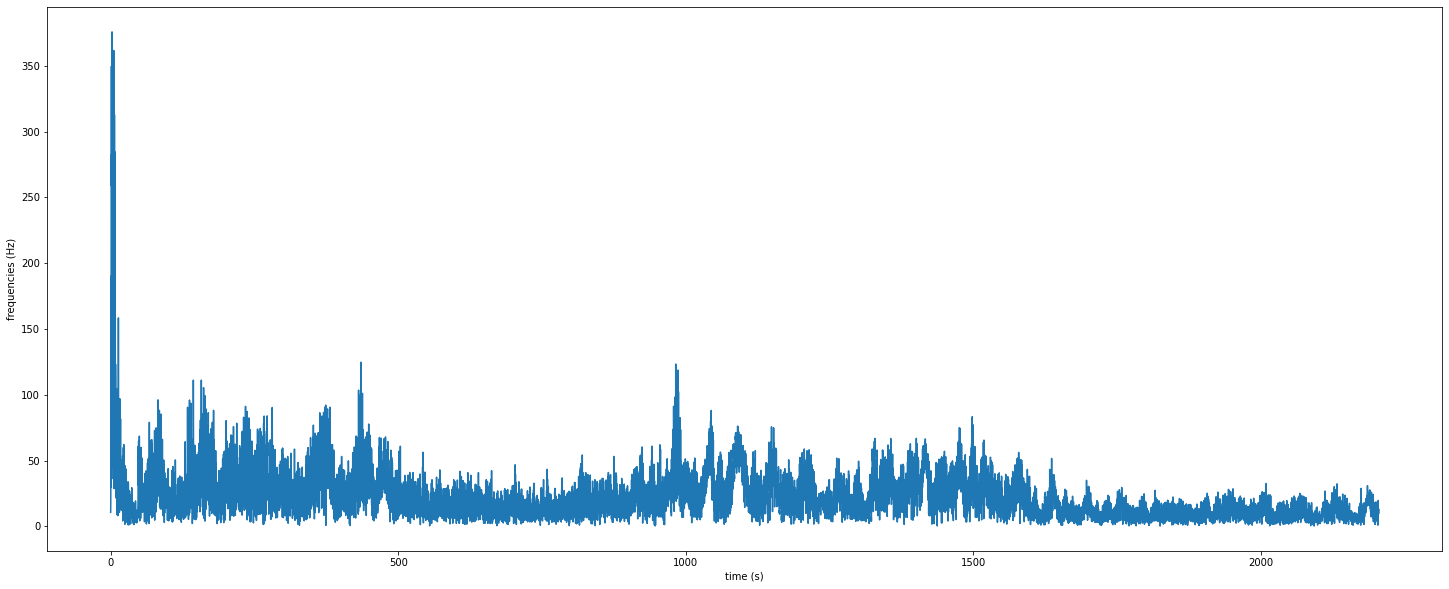

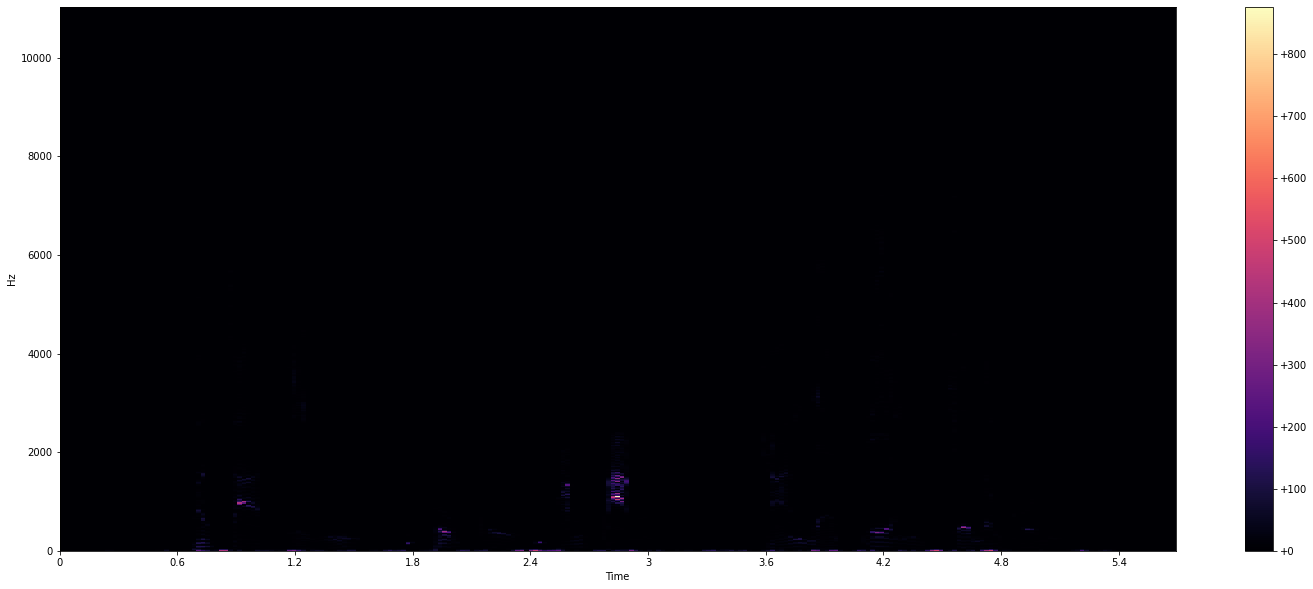

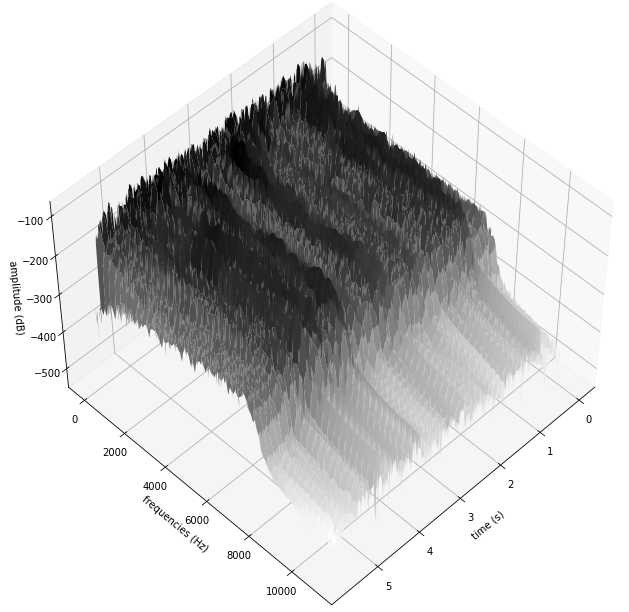

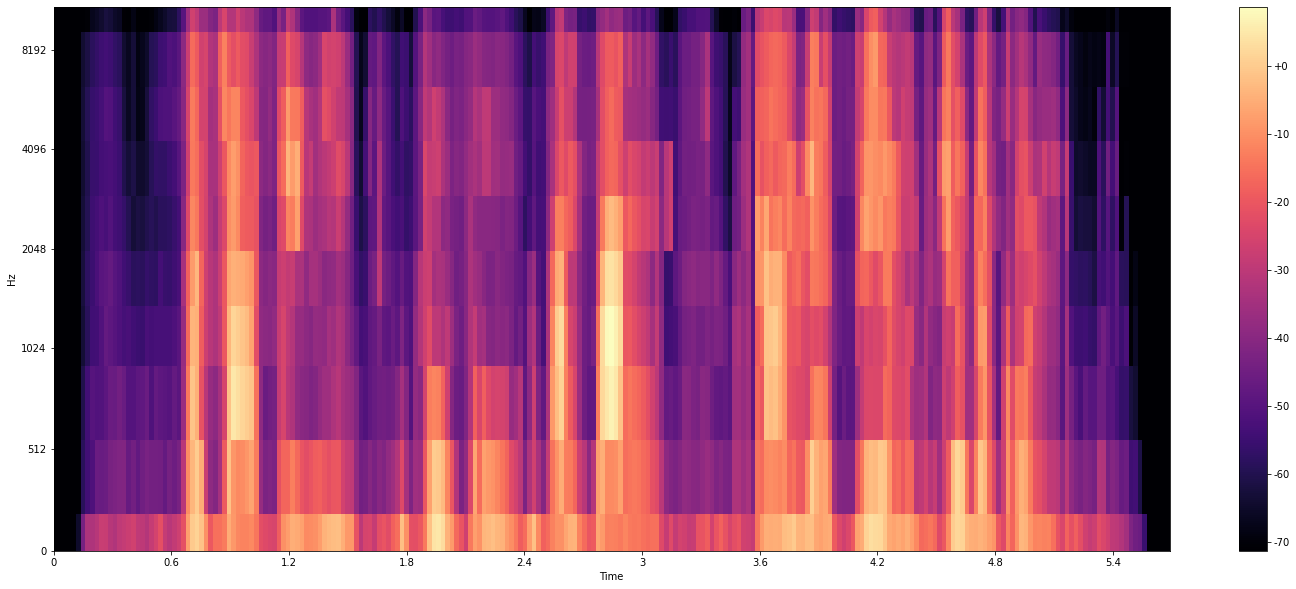

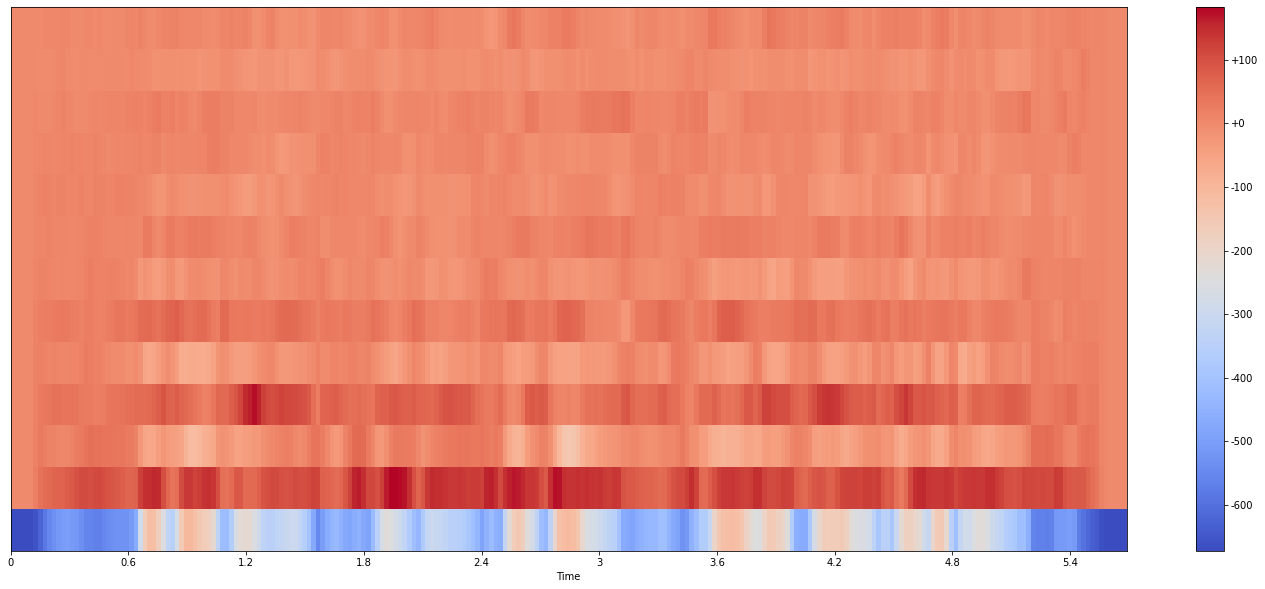

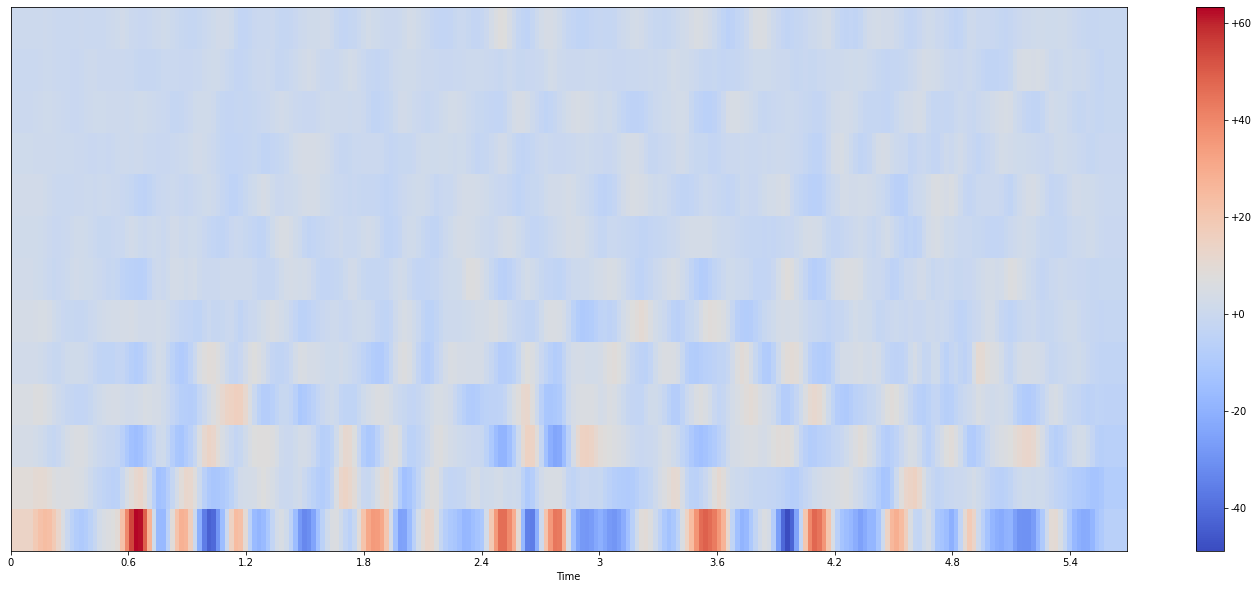

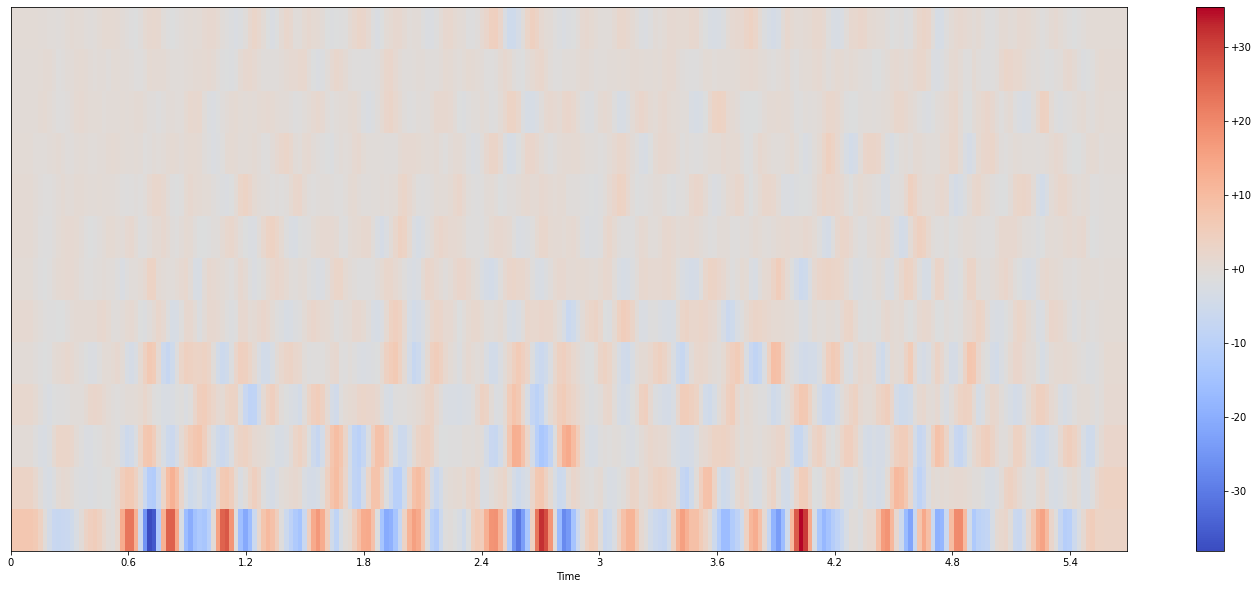

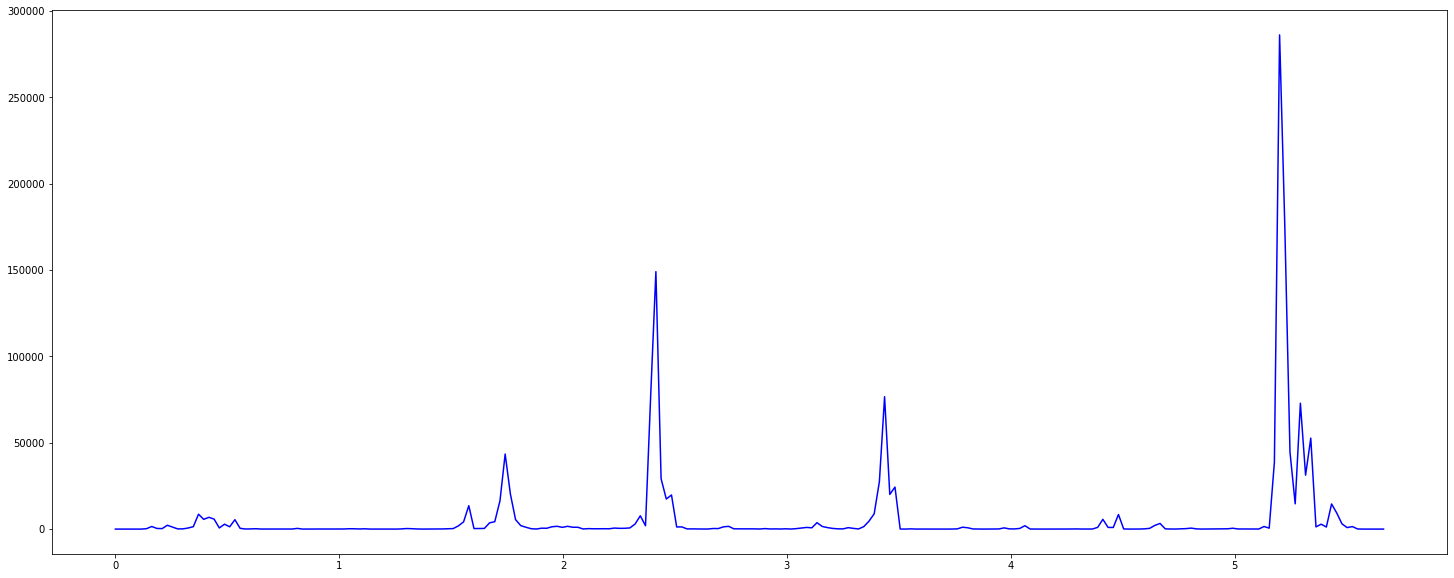

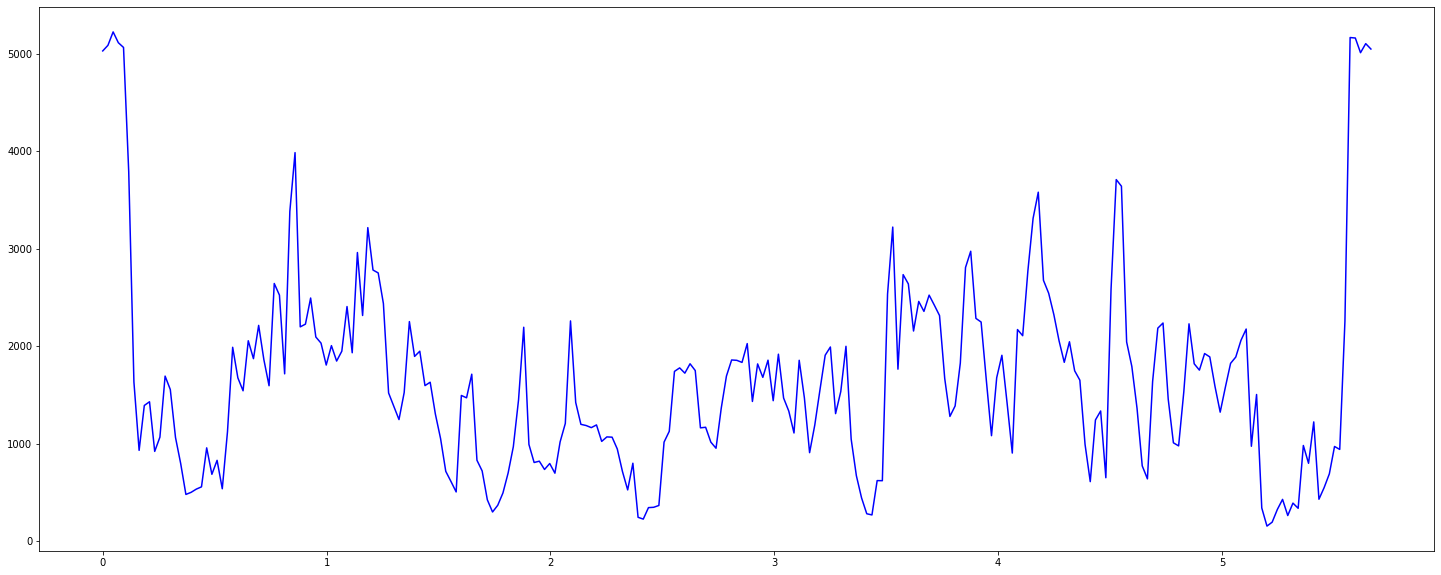

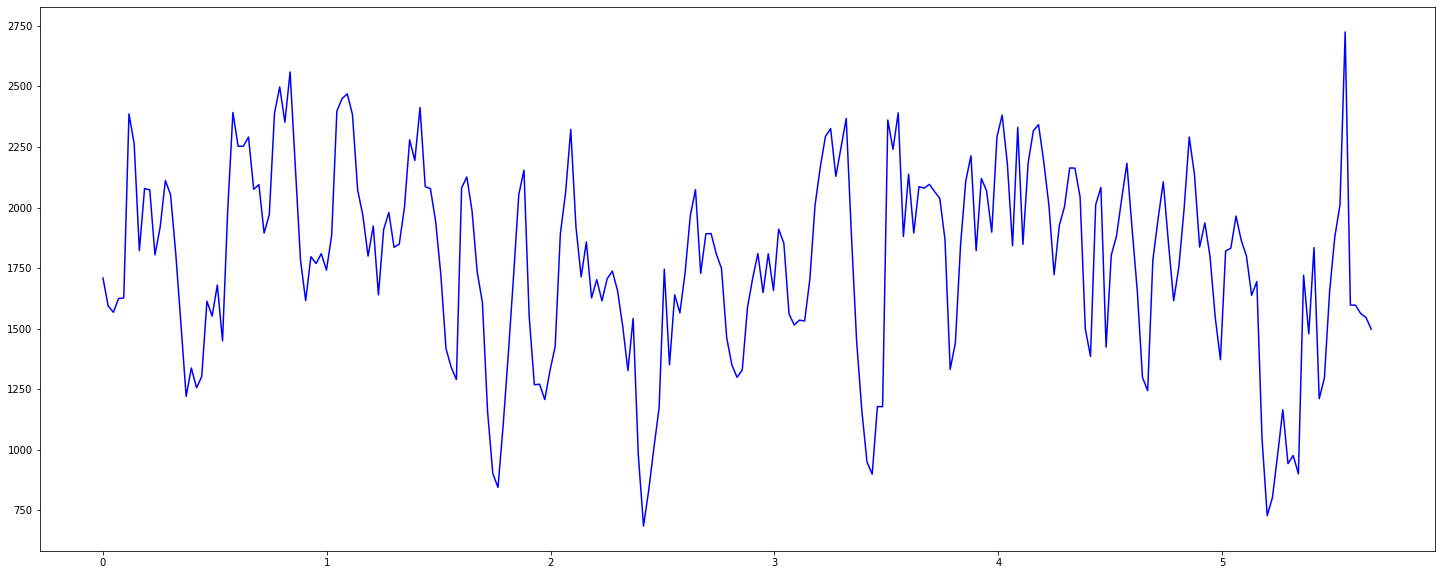

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


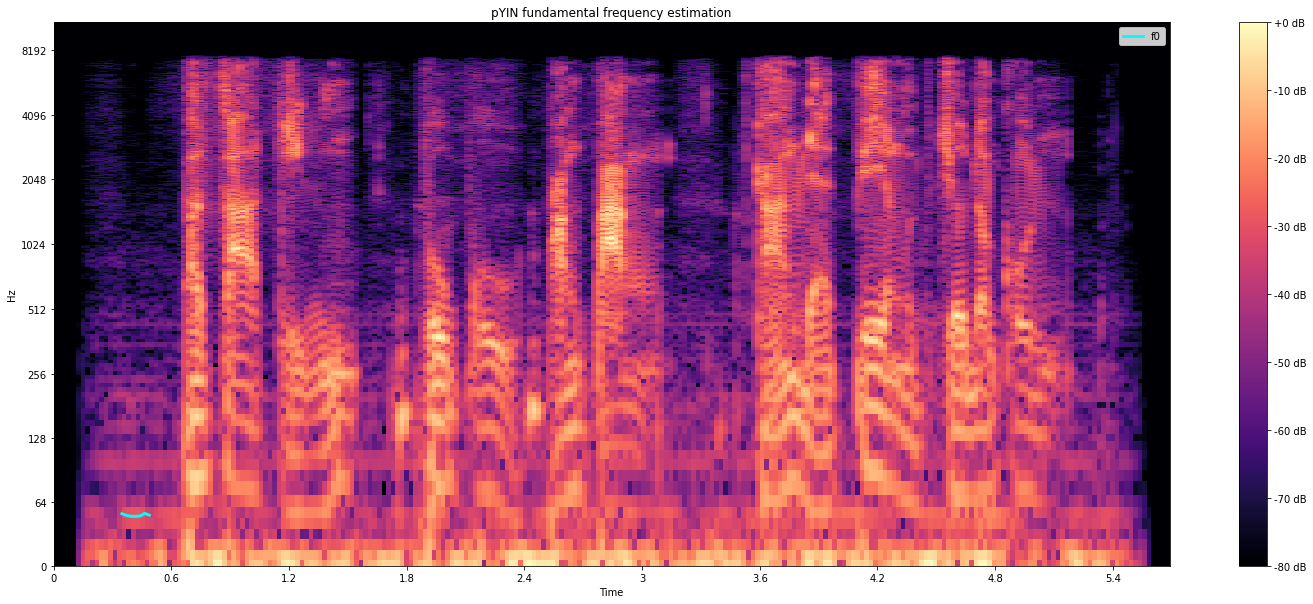

In [3]:
BASE_DIR = './'
WAVEFILE = '0001/0001_0001.wav'

wave, sr = librosa.load(os.path.join(BASE_DIR, WAVEFILE))

_fourier(wave, sr)

_spectrogram(wave, sr)

_spectrogram_3d(wave, sr)

_mel_spectrogram(wave, sr)

_mel_frequency_ceptrum_coefficient(wave, sr)

_mel_frequency_ceptrum_coefficient_delta(wave, sr)

_mel_frequency_ceptrum_coefficient_delta_two(wave, sr)

_band_energy_ratio(wave, 2000, sr)

_spectal_centriod(wave, sr)

_spectral_banwidth(wave, sr)

_fundamental_frequency(wave, sr)

# plt.show()

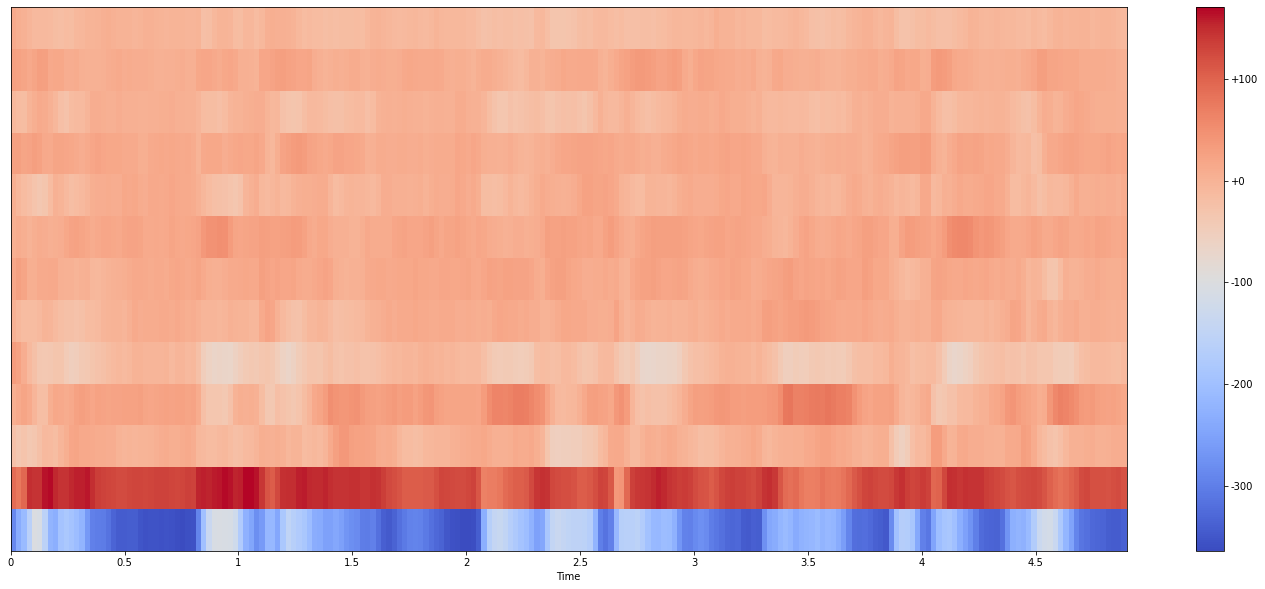

In [252]:
BASE_DIR = './'
WAVEFILE = '0002/M002_PD247.wav'

wave, sr = librosa.load(os.path.join(BASE_DIR, WAVEFILE))

# _fourier(wave, sr)

# _spectrogram(wave, sr)

# _spectrogram_3d(wave, sr)

# _mel_spectrogram(wave, sr)

_mel_frequency_ceptrum_coefficient(wave, sr)

# _mel_frequency_ceptrum_coefficient_delta(wave, sr)

# _mel_frequency_ceptrum_coefficient_delta_two(wave, sr)

# _band_energy_ratio(wave, 2000, sr)

# _spectal_centriod(wave, sr)

# _spectral_banwidth(wave, sr)

# _fundamental_frequency(wave, sr)
plt.show()